Code that compares multiple the DNA sequences for percentage similarity then plots the data in a heatmap

In [1]:
#packages needed
from Bio.Seq import Seq
from Bio import pairwise2
import pandas as pd
import seaborn as sns

Defining a percent function which compares the DNA sequences for percentage identity and feeds the results into the match_dic library. The alignment used is +1 for a match and 0 for a gap or mismatch

In [2]:
def percent(seq1, dna1, seq2, dna2):
    alignments = pairwise2.align.globalxx(dna1, dna2, score_only = True)
    seq_length = max(len(dna1), len(dna2))
    percent_match = (alignments / seq_length) * 100
    match_dic["sequence_1"].append(seq1)
    match_dic["sequence_2"].append(seq2)
    match_dic["percent_match"].append(percent_match)	 

In [3]:
#an empty dictionary ready for the percentage similarity output  
match_dic = {"sequence_1":[],"sequence_2":[],"percent_match":[]}

Inputting the data ready for comparison

In [38]:
#imput of raw data
seq_1 = Seq("GGCTTCACCCTTAGGGCATTAGCCCCTTAACCCTCTATTAGGCGCATTAATTAGGTCTATTACCCTTAACCATTACATTAGGGGGCTTATTCAGGCATTAGGTCTCATTAGATTAG")
seq_2 = Seq("TTAAGCGCATTAATTAGCCCCTTAACCCTCTATACCCTTATAGGGCATTAGCCCCTTAACCCTCTATTAGGGCATTAGCCCCTTAACCCTCTATTAGGC")
seq_3 = Seq("GGCATTAGCCCCGCATTATTAAACCCTTACCCTCTATTAGGTTATGCATTAGGGCATTAGCCCCTTAACCCTCTGCATTAATTAGGCCA")
seq_4 = Seq("GGCTTCACCCTTAGGGCATTAGCCCCTTAACCCTCTATTAGGCGCATTAATTAGGTCTATTACCCTTAACCATTACATTAGGGGGCTTATTCAGGCATTAGGTC")
seq_5 = Seq("TTAAGCGCATTAATTAGCCCCTTAACCCTCTATACCCTTATACCTGGGCATTAGCCCCTTAACCCTCTATTAGGGCATTAGCCCCTTAACCCTCTATTAGG")
seq_6 = Seq("CCCTTAACCCTTATTAAACCCTTCCTTATAGTAGGGCATTAGCCCCTTAACCCTCTATTAGTATTAAACCCTTGGGGCTTATTATTAAACCCTTTAGGTC")

#adding data into a library so data retains the name of the DNA
seq_dic = {
    "seq_1": seq_1, 
    "seq_2": seq_2, 
    "seq_3" : seq_3,
    "seq_4": seq_4,
    "seq_5" : seq_5,
    "seq_6": seq_6
        }

The nested for loop, designed to run each of the four dna sequences against each other

In [39]:
for seq1, dna1 in seq_dic.items():
    for seq2, dna2 in seq_dic.items():
        percent(seq1, dna1, seq2, dna2)

Converting the resulting dictionary into a pandas dataframe

In [40]:
data_match_long = pd.DataFrame.from_dict(match_dic)
data_match_long

,sequence_1,sequence_2,percent_match
0,seq_1,seq_1,100.000000
1,seq_1,seq_2,69.827586
2,seq_1,seq_3,63.793103
3,seq_1,seq_4,70.085470
4,seq_2,seq_1,69.827586
...,...,...,...
111,seq_6,seq_2,76.000000
112,seq_6,seq_3,67.000000
113,seq_6,seq_4,69.230769
114,seq_6,seq_5,75.247525


Pivoting the dataframe into a wide format so seaborn can generate a heatmap

In [41]:
data_match = data_match_long.pivot_table(index = 'sequence_1', columns = 'sequence_2', values = 'percent_match')     
data_match

sequence_2,seq_1,seq_2,seq_3,seq_4,seq_5,seq_6
sequence_1,,,,,,
seq_1,100.000000,69.827586,63.793103,79.835827,69.827586,63.793103
seq_2,69.827586,100.000000,71.717172,73.419664,97.029703,76.000000
seq_3,63.793103,71.717172,100.000000,67.144512,71.287129,67.000000
seq_4,79.835827,73.419664,67.144512,100.000000,73.076923,69.230769
seq_5,69.827586,97.029703,71.287129,73.076923,100.000000,75.247525
seq_6,63.793103,76.000000,67.000000,69.230769,75.247525,100.000000


Visualizing the data using a heatmap

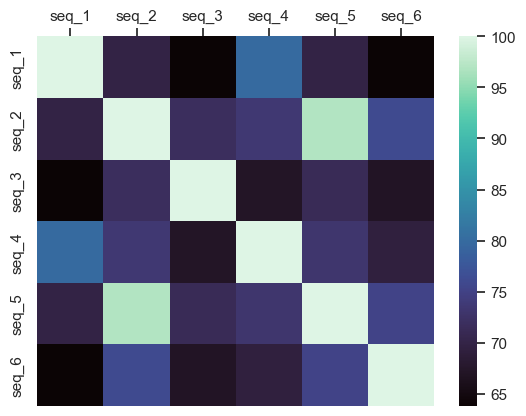

In [42]:
sns.set_theme()
hm = sns.heatmap(data_match, cmap="mako")
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()